In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, chi2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
draftdf = pd.read_csv('../draft_data.csv')

In [4]:
performancedf = pd.read_csv('../performance_data.csv')

In [5]:
draftdf.head()

,Unnamed: 0,Round,Pick,Overall,Team,Player,Position,Year,overall_pick,pick_points
0,0,1.0,1.0,2018-1,BUF,Rasmus Dahlin,D,2018,1,216
1,1,1.0,2.0,2018-2,CAR,Andrei Svechnikov,F,2018,2,215
2,2,1.0,3.0,2018-3,MTL,Jesperi Kotkaniemi,F,2018,3,214
3,3,1.0,4.0,2018-4,OTT,Brady Tkachuk,F,2018,4,213
4,4,1.0,5.0,2018-5,ARI,Barrett Hayton,F,2018,5,212


In [6]:
performancedf.head()

,Unnamed: 0,Year,Team,GP,W,L,year_diff,wins_change
0,232,2007,ANA,82,48,20,NaN,NaN
1,267,2008,ANA,82,47,27,1.0,-0.020833
2,313,2009,ANA,82,42,33,1.0,-0.106383
3,345,2010,ANA,82,39,32,1.0,-0.071429
4,372,2011,ANA,82,47,30,1.0,0.205128


In [7]:
draftdf['round_mult'] = 8 - draftdf['Round']

In [8]:
draftdf['pick_points'] = draftdf['round_mult'] * (39 - draftdf['Pick'])

In [9]:
performancedf['change_direction'] = 'positive'

In [10]:
mask = performancedf.wins_change < 0
performancedf.loc[mask, 'change_direction'] = 'negative'

In [11]:
performancedf.head()

,Unnamed: 0,Year,Team,GP,W,L,year_diff,wins_change,change_direction
0,232,2007,ANA,82,48,20,NaN,NaN,positive
1,267,2008,ANA,82,47,27,1.0,-0.020833,negative
2,313,2009,ANA,82,42,33,1.0,-0.106383,negative
3,345,2010,ANA,82,39,32,1.0,-0.071429,negative
4,372,2011,ANA,82,47,30,1.0,0.205128,positive


In [12]:
draftgroup1 = pd.DataFrame({'pick_points':draftdf.groupby(['Year', 'Team', 'Position'])['pick_points'].sum()}).reset_index()
draftgroup1

,Year,Team,Position,pick_points
0,1970,BOS,D,496.0
1,1970,BOS,F,1173.0
2,1970,BOS,G,312.0
3,1970,BUF,D,532.0
4,1970,BUF,F,1254.0
5,1970,BUF,G,76.0
6,1970,CHI,D,250.0
7,1970,CHI,F,675.0
8,1970,CHI,G,150.0
9,1970,CSE,D,340.0


In [13]:
draftgroup1['top_drafted'] = draftgroup1['Position']
draftgroup1.head()

,Year,Team,Position,pick_points,top_drafted
0,1970,BOS,D,496.0,D
1,1970,BOS,F,1173.0,F
2,1970,BOS,G,312.0,G
3,1970,BUF,D,532.0,D
4,1970,BUF,F,1254.0,F


In [14]:
draftgroup1.groupby(['Year', 'Team'])['pick_points'].max()

Year  Team
1970  BOS     1173.0
      BUF     1254.0
      CHI      675.0
      CSE     1087.0
      DET      972.0
      LAK      854.0
      MNS      990.0
      MTL      700.0
      NYR     1092.0
      PHI     1190.0
      PIT     1184.0
      STL      900.0
      TOR     1519.0
      VAN      703.0
1971  BOS      775.0
      BUF     1054.0
      CHI     1269.0
      CSE      684.0
      DET      925.0
      LAK      794.0
      MNS      960.0
      MTL     1412.0
      NYR      983.0
      PHI      737.0
      PIT     1120.0
      STL      477.0
      TOR     1140.0
      VAN      928.0
1972  AFM      814.0
      BOS      851.0
               ...  
2018  ARI      694.0
      BOS      370.0
      BUF     1146.0
      CAR     1107.0
      CBJ      651.0
      CGY      650.0
      CHI      894.0
      COL      805.0
      DAL     1426.0
      DET     1078.0
      EDM      420.0
      FLA      816.0
      LAK      819.0
      MIN      758.0
      MTL     2002.0
      NJD      330.0
  

In [15]:
draftgroup2 = pd.DataFrame({'pick_points':draftgroup1.groupby(['Year', 'Team'])['pick_points'].max()}).reset_index()
draftgroup2.head()

,Year,Team,pick_points
0,1970,BOS,1173.0
1,1970,BUF,1254.0
2,1970,CHI,675.0
3,1970,CSE,1087.0
4,1970,DET,972.0


In [16]:
draftgroup1.drop('top_drafted', axis=1, inplace=True)

In [17]:
draftgroup1.head()

,Year,Team,Position,pick_points
0,1970,BOS,D,496.0
1,1970,BOS,F,1173.0
2,1970,BOS,G,312.0
3,1970,BUF,D,532.0
4,1970,BUF,F,1254.0


In [18]:
topdrafted = draftgroup2.merge(draftgroup1, how='inner', on=['Team', 'Year', 'pick_points'])
topdrafted.head()

,Year,Team,pick_points,Position
0,1970,BOS,1173.0,F
1,1970,BUF,1254.0,F
2,1970,CHI,675.0,F
3,1970,CSE,1087.0,F
4,1970,DET,972.0,F


In [19]:
topdrafted.shape

(1206, 4)

In [20]:
perform = performancedf[performancedf['year_diff'] == 1]
perform.head()
perform.shape

(1040, 9)

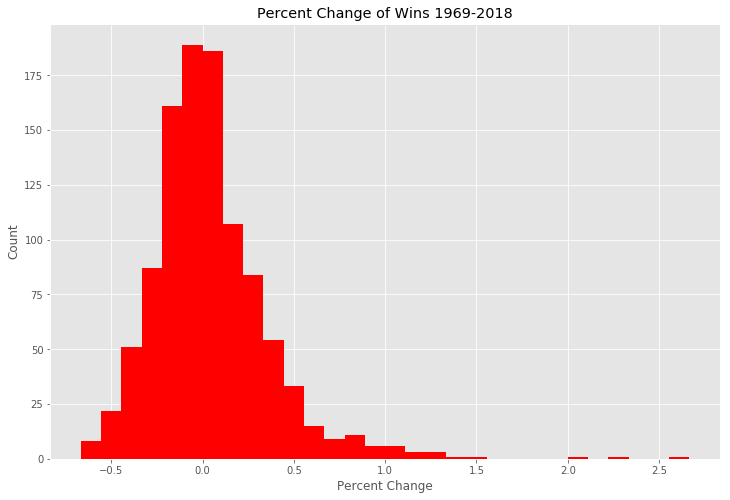

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(perform['wins_change'], bins=30, alpha=1, color='red')
ax.set_title('Percent Change of Wins 1969-2018')
ax.set_ylabel('Count')
ax.set_xlabel('Percent Change');

In [22]:
perform_change = perform[['Year', 'Team', 'change_direction']].reset_index()
perform_change.head()

,index,Year,Team,change_direction
0,1,2008,ANA,negative
1,2,2009,ANA,negative
2,3,2010,ANA,negative
3,4,2011,ANA,positive
4,5,2012,ANA,negative


In [23]:
perform_change.drop('index', axis=1, inplace=True)

In [24]:
draft_direction = perform_change.merge(topdrafted, on=['Year', 'Team'], how='inner')
draft_direction.drop('pick_points', axis = 1, inplace=True)
draft_direction.head()

,Year,Team,change_direction,Position
0,2008,ANA,negative,F
1,2009,ANA,negative,D
2,2010,ANA,negative,F
3,2011,ANA,positive,F
4,2012,ANA,negative,D


In [25]:
final = draft_direction.groupby(['Position', 'change_direction']).count()
final.drop('C/LW', axis=0, inplace=True)
final.head()

Year  Team
Position change_direction            
D        negative           103   103
         positive           134   134
F        negative           372   372
         positive           370   370
G        negative             8     8

In [26]:
test_df = final['Year'].unstack()
test_df

change_direction,negative,positive
Position,,
D,103,134
F,372,370
G,8,6


In [27]:
chi_test_data = test_df.values.T

In [28]:
chi2_contingency(chi_test_data)
cs_result, pval_result, df, exp_result = chi2_contingency(chi_test_data)

In [29]:
df = 2
x = np.linspace(chi2.ppf(0.001, df), chi2.ppf(0.999, df), 200)
rv = chi2(df)

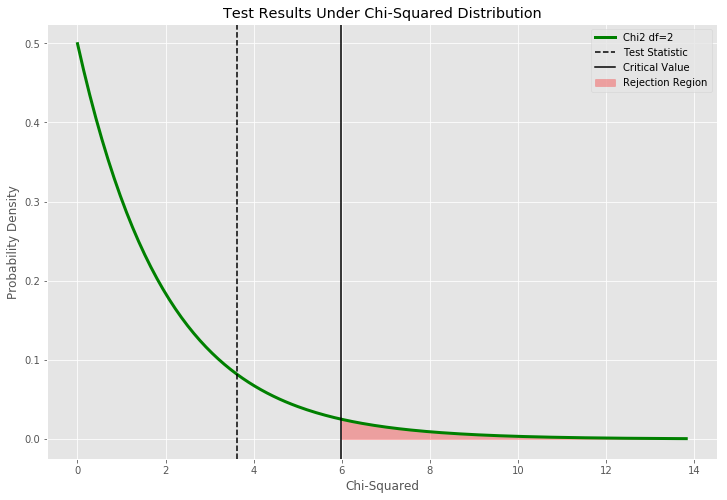

In [30]:
val = chi2.ppf(0.95, df)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, rv.pdf(x), lw=3, label='Chi2 df=2', color='green')
ax.axvline(cs_result, color='k', linestyle='--', label='Test Statistic')
ax.axvline(val, color='k', label='Critical Value')
#ax.fill_between(x, 0, rv.pdf(x), where=x > cs_result, color='red', alpha=.15, label='Significance Gap')
#ax.fill_between(x, 0, rv.pdf(x), where=x >= chi2.ppf(0.95,df), color='green', alpha=.3, label='Rejection Region')
xprime = np.linspace(val, chi2.ppf(.999, df), 200)
ax.fill_between(xprime, 0, chi2.pdf(xprime, df), color='red', alpha=.3, label='Rejection Region')
ax.set_title('Test Results Under Chi-Squared Distribution')
ax.set_xlabel('Chi-Squared')
ax.set_ylabel('Probability Density')
plt.legend(loc='upper right');